#  Applied Machine Learning - Preprocessing 


## Table of Contents

- [Instructions](#si)
- [Introduction](#in)
- [Exercise 1: Introducing the dataset](#1)
- [Exercise 2: Exploratory data analysis (EDA)](#2)
- [Exercise 3: Preprocessing](#3)
- [Exercise 4: Building models](#4)
- [Exercise 5: Evaluating on the test set](#5)

## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Introducing the dataset <a name="1"></a>
<hr>

In this lab, i will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` locally in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census = pd.read_csv("adult.csv", sep=",")

<br><br>

### 1.1 Data splitting 

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**tasks:**

1. Split the data into `train_df` (60%) and `test_df` (40%) with `random_state = 42`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 60%/40% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_

In [4]:
train_df, test_df = train_test_split(census_df, test_size=0.6, random_state=42)

<br><br>

## Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

>Let's examine our `train_df`. 

In [5]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


>I see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [6]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(13024, 15)

In [7]:
train_df_nan.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


>The "?" symbols are now replaced with NaN values. 

<br><br>

###  Visualizing features


**tasks:**

1. Examine the information given by `train_df_nan.info()` and `train_df_nan.describe()` methods. In case of `.describe()`, use the `include="all"` argument to show summary statistics of all  features.
2. Visualize the histograms of numeric features. 
3. From the visualizations, which features seem relevant for the given prediction task?


In [8]:
train_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13024 entries, 2729 to 23654
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             13024 non-null  int64 
 1   workclass       12288 non-null  object
 2   fnlwgt          13024 non-null  int64 
 3   education       13024 non-null  object
 4   education.num   13024 non-null  int64 
 5   marital.status  13024 non-null  object
 6   occupation      12284 non-null  object
 7   relationship    13024 non-null  object
 8   race            13024 non-null  object
 9   sex             13024 non-null  object
 10  capital.gain    13024 non-null  int64 
 11  capital.loss    13024 non-null  int64 
 12  hours.per.week  13024 non-null  int64 
 13  native.country  12786 non-null  object
 14  income          13024 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.6+ MB


In [9]:
train_df_nan.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12288,1.302400e+04,13024,13024.000000,13024,12284,13024,13024,13024,13024.000000,13024.000000,13024.000000,12786,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9086,NaN,4166,NaN,6075,1678,5323,11117,8727,NaN,NaN,NaN,11651,9886
mean,38.573557,NaN,1.895584e+05,NaN,10.094211,NaN,NaN,NaN,NaN,NaN,1085.148034,87.537776,40.528332,NaN,NaN
std,13.631541,NaN,1.065623e+05,NaN,2.581355,NaN,NaN,NaN,NaN,NaN,7415.815814,403.494022,12.419290,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.172220e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.774870e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383602e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
numeric_features = train_df_nan.select_dtypes(include=np.number).columns.tolist()

In [11]:
numeric_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

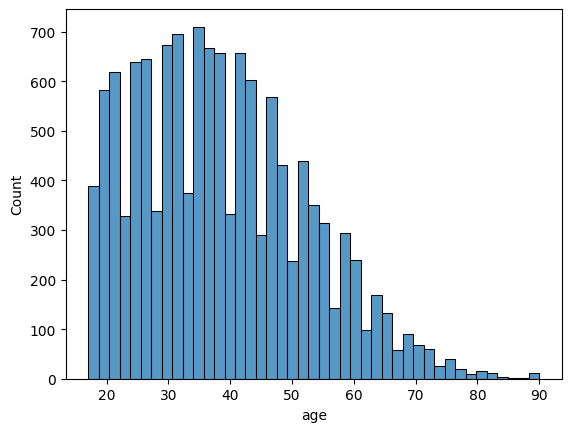

In [12]:
import seaborn as sns
sns.histplot(data=train_df_nan, x='age');

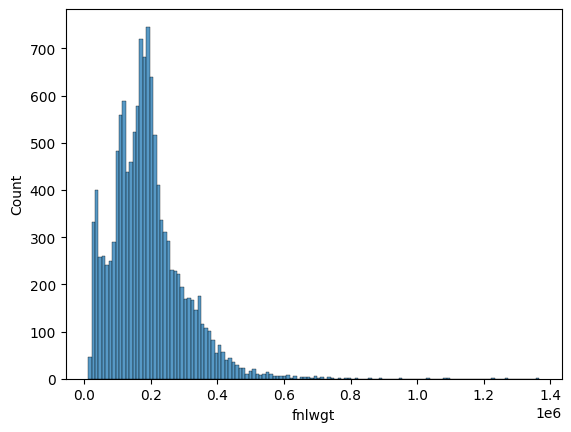

In [13]:
sns.histplot(data=train_df_nan, x='fnlwgt');

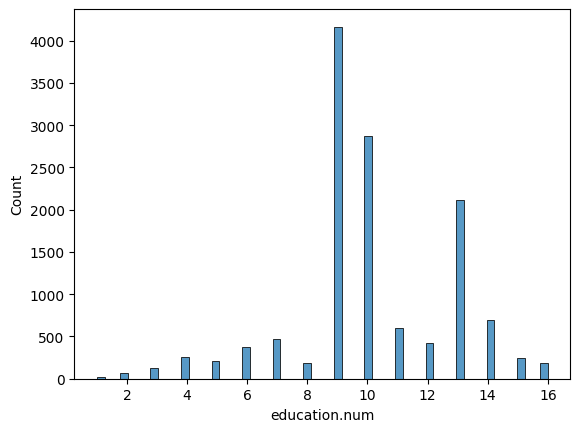

In [14]:
sns.histplot(data=train_df_nan, x='education.num');

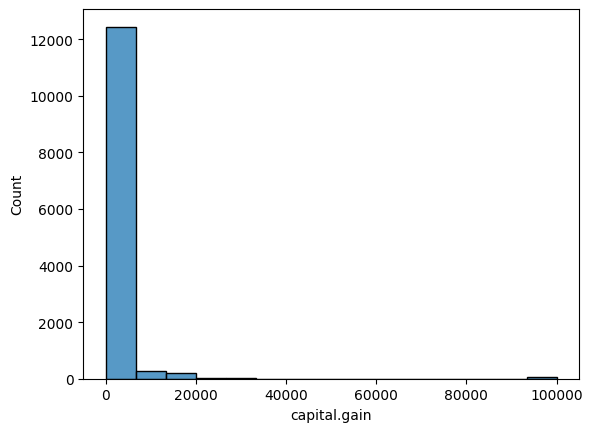

In [15]:
sns.histplot(data=train_df_nan, x='capital.gain');

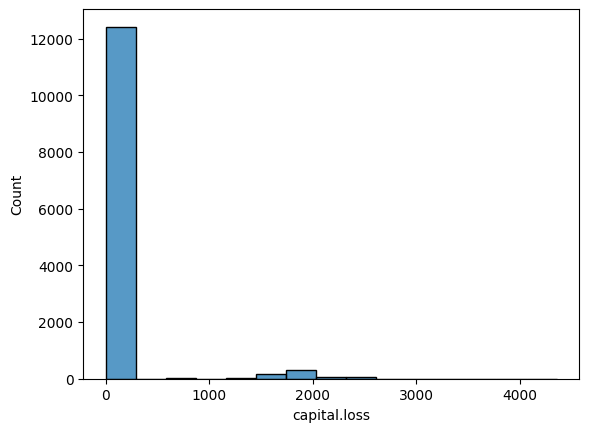

In [16]:
sns.histplot(data=train_df_nan, x='capital.loss');

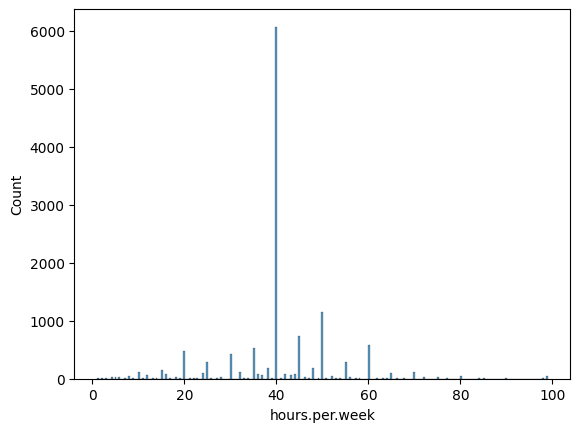

In [17]:
sns.histplot(data=train_df_nan, x='hours.per.week');

<br><br>

###  Identify transformations to apply

**tasks:**
1. Identify the sequence of transformations that you would apply on each column in the dataset and fill in the table below accordingly. An example of the sequence of transformations to be applied on the `occupation` feature is shown in the table below. You may decide not to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. 
2. Are there common transformations you would like to apply on certain types of features? Identify different feature types for applying different transformations. In particular, fill in the lists below. 
3. Is including the `race` feature for predicting income ethically a good idea? Briefly discuss. 


| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, OHE |
| age | |
| workclass |  |
| fnlwgt |  |
| education |  |
| education.num |  |
| marital.status |  |
| relationship |  |
| race |  |
| sex |  |
| capital.gain |  |
| capital.loss |  |
| hours.per.week |  |
| native.country |  |


In [18]:
train_df_nan.describe(include='all').head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.0,12288,13024.0,13024,13024.0,13024,12284,13024,13024,13024,13024.0,13024.0,13024.0,12786,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9086,NaN,4166,NaN,6075,1678,5323,11117,8727,NaN,NaN,NaN,11651,9886


In [19]:
train_df_nan['hours.per.week']

2729      8
6850     25
414      40
7887     40
23438    35
         ..
29802    40
5390     40
860      40
15795    50
23654    50
Name: hours.per.week, Length: 13024, dtype: int64

In [20]:
# Fill in the lists below. 
# It's OK to keep some of the lists empty or add new lists. 
numeric_features = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', ]
categorical_features = ['workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'native.country', ]
ordinal_features = []
binary_features = ['sex']
drop_features = []
passthrough_features = []
target = "income"

<br><br>

###  Separating feature vectors and targets  

**tasks:**

1. Creating `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`. 
2. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not?

In [21]:
X_train = train_df_nan.drop('income', axis = 1)
y_train = train_df_nan['income']

X_test = test_df_nan.drop('income', axis = 1)
y_test = test_df_nan['income']

In [24]:
svc = SVC()
svc.fit(X_train,
       y_train)

ValueError: could not convert string to float: 'Private'

> It will not work because scikit-learn's SVC model is designed for classification tasks and can be trained on appropriately formatted feature data (X_train) and corresponding target labels (y_train). If our datasets follow the expected format and i have the necessary dependencies installed, you should be able to train the SVC model using scikit-learn.

<br><br><br><br>

## Preprocessing <a name="3"></a>
<hr>

###  Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`


Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that i can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly i can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

I may use the method of my choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

**tasks:**

1. Create a column transformer `preprocessor` based on transformations you want to apply on the data. 
2. Transform the data by calling `fit_transform` on the training set. What's the shape of the transformed data? 
3. Why do i need to use a column transformer in this case?

In [29]:
from sklearn import set_config

set_config(display="diagram")

In [30]:
preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown="ignore")),categorical_features),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_features),  
)

In [31]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'capital.gain',
                                  'capital.loss', 'hours.per.week']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'education', 'education.num',
                                  'marital.status', 'occupation',
                                  'relationship', 'race', 'native.country']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['sex'])])

In [36]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
dtype: object

>A column transformer is a tool that helps handle different types of data by applying specific transformations to each type. It ensures proper preprocessing without mixing things up, making it easier to work with diverse data in a structured and organized way.

<br><br><br><br>

### Exercise 4: Building models <a name="4"></a>
<hr>

Now that i have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model.

In [37]:
results_dict = {} # dictionary to store all the results

In [38]:

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<br><br>

### Baseline model 

**tasks:**
1. Define a pipeline with two steps: `preprocessor` from 3.1 and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier.  
2. Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict` above. Display the results as a pandas DataFrame.  

> using the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [39]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [40]:
clf = make_pipeline(preprocessor, DummyClassifier(strategy='prior'))

results_dict['dummy'] = mean_std_cross_val_scores(clf, X_train, y_train, cv=5)

In [41]:
pd.DataFrame(results_dict)

,dummy
fit_time,0.087 (+/- 0.013)
score_time,0.022 (+/- 0.002)
test_score,0.759 (+/- 0.000)


<br><br>

### Trying different classifiers


**tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 3.1 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline.  
    - Store the results in `results_dict`. 
2. Display all the results so far as a pandas dataframe. 
3. Compare the train and validation accuracies and `fit` and `score` times in each case. How do the the validation accuracies compare to the baseline model from 4.1? Which model has the best validation accuracy? Which model is the fastest one?  

> Note that this might take a while to run.

> You may use the function above `mean_std_cross_val_scores` to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [42]:
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

In [43]:
for clf in models:
    preprocessor_clf = make_pipeline(preprocessor, models[clf])
    results_dict[clf] = mean_std_cross_val_scores(preprocessor_clf, X_train, y_train, cv=5)

In [44]:
results_dataframe = pd.DataFrame(results_dict)

In [45]:
results_dataframe

,dummy,decision tree,kNN,RBF SVM
fit_time,0.087 (+/- 0.013),0.540 (+/- 0.052),0.077 (+/- 0.004),4.880 (+/- 0.023)
score_time,0.022 (+/- 0.002),0.023 (+/- 0.003),1.622 (+/- 0.035),0.754 (+/- 0.047)
test_score,0.759 (+/- 0.000),0.807 (+/- 0.004),0.830 (+/- 0.009),0.852 (+/- 0.006)


In [46]:
print("The best model with highest test accuracy is {} of model {}".format(results_dataframe.loc['test_score', 'RBF SVM'], "RBF_SVM"))

The best model with highest test accuracy is 0.852 (+/- 0.006) of model RBF_SVM


<br><br>

###  Hyperparameter optimization


In this i'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. For the purpose of this assignment, i'll only do it for the `SVC` classifier with one hyperparameter: `C`. 

**tasks:**

1. For each `C` value in the `param_grid` in the starter code below: 
    - Create a pipeline object with two steps: preprocessor from 3.1 and `SVC` classifier with the value of `C`.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this might take a while. 

In [ ]:
param_grid = {"C": np.logspace(-2, 2, 4)}

for C in list(param_grid["C"]):
    clf = make_pipeline(preprocessor, SVC(C=C))
    results_dict[f'SVC_{C}'] = mean_std_cross_val_scores(clf, X_train, y_train, cv=5)

In [63]:
pd.DataFrame(results_dict)

,dummy,decision tree,kNN,RBF SVM,SVC_[1.00000000e-02 2.15443469e-01 4.64158883e+00 1.00000000e+02],SVC_0.01,SVC_0.21544346900318834,SVC_4.6415888336127775,SVC_100.0
fit_time,0.095 (+/- 0.008),0.692 (+/- 0.017),0.103 (+/- 0.007),11.913 (+/- 0.724),0.108 (+/- 0.009),13.608 (+/- 0.865),12.981 (+/- 0.451),15.331 (+/- 0.275),34.362 (+/- 0.917)
score_time,0.028 (+/- 0.002),0.027 (+/- 0.001),3.250 (+/- 0.115),1.769 (+/- 0.197),0.000 (+/- 0.000),2.213 (+/- 0.295),2.081 (+/- 0.126),1.974 (+/- 0.053),1.949 (+/- 0.132)
test_score,0.760 (+/- 0.000),0.812 (+/- 0.009),0.833 (+/- 0.006),0.853 (+/- 0.006),nan (+/- nan),0.776 (+/- 0.003),0.851 (+/- 0.006),0.855 (+/- 0.007),0.832 (+/- 0.007)


<br><br><br><br>

##  Evaluating on the test set <a name="5"></a>
<hr>

Now that i have a best performing model, it's time to assess our model on the set aside test set. In this i'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

###  Scoring on the unseen test set 

**tasks:**

1. Train the best performing model on the entire training set. 
2. Report the results of this model on `X_test`. 
3. Are the cross-validation results and test results consistent? 

In [ ]:
clf = make_pipeline(preprocessor, SVC(C=4.64))
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

<br><br><br><br>